# Import Library

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data

In [120]:
X = pd.read_excel (r'/content/drive/MyDrive/data_statpro.xlsx')
X
#Keterangan Variabel
#X1 : Listrik yang Didistribusikan Menurut Provinsi (GWh) Tahun 2019
#X2 : Volume Air yang Disalurkan Perusahaan Air Bersih Menurut Provinsi (ribu m3) Tahun 2019

,kode_prov,provinsi,X1,X2
0,11,Aceh,2781.50,47756
1,12,Sumatera Utara,8324.86,252098
2,13,Sumatera Barat,3445.08,101036
3,14,Riau,4646.79,20710
4,15,Jambi,1932.00,40393
5,16,Sumatera Selatan,5258.23,153784
6,17,Bengkulu,955.47,25690
7,18,Lampung,4686.09,18181
8,19,Kepulauan Bangka Belitung,1166.93,8377
9,21,Kepulauan Riau,3346.31,116252


In [121]:
round(X.iloc[:,2:4].describe(include='all'),2)

,X1,X2
count,34.00,34.00
mean,7283.92,121478.62
std,12591.18,167495.74
min,264.55,5964.00
25%,1014.03,20081.50
50%,2677.10,40907.00
75%,5115.20,151297.50
max,54480.28,731229.00


In [122]:
X_use = X.iloc[:,2:4]
label = X.iloc[:,1]
label.unique()
label = ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI',
       'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH',
       'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO',
       'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT','PAPUA']

## Detect Outliers

In [123]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[34107.88, 54480.28, 24750.62, 37228.94, 24646.11]

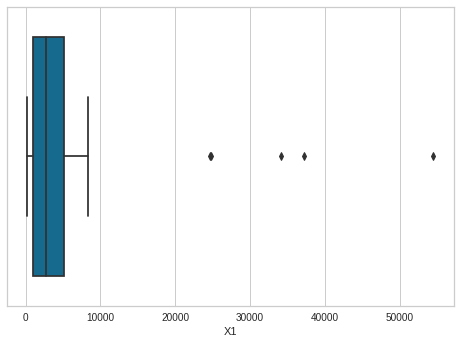

In [124]:
# Box Plot
sns.boxplot(X['X1'])
detect_outlier(X['X1'])


In [125]:
X.query("X1 == 34107.88 or X1 == 54480.28 or X1 == 24750.62 or X1 == 37228.94 or X1 == 24646.11")

,kode_prov,provinsi,X1,X2
10,31,DKI Jakarta,34107.88,511855
11,32,Jawa Barat,54480.28,384202
12,33,Jawa Tengah,24750.62,451564
14,35,Jawa Timur,37228.94,731229
15,36,Banten,24646.11,225860


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[511855, 384202, 451564, 731229]

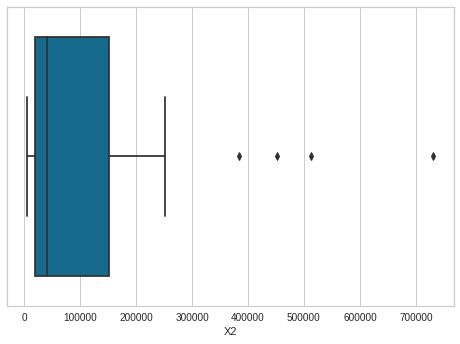

In [126]:
sns.boxplot(X['X2'])
detect_outlier(X['X2'])

In [127]:
X.query("X2 == 511855 or X2 == 384202 or X2 == 451564 or X2 == 731229")

,kode_prov,provinsi,X1,X2
10,31,DKI Jakarta,34107.88,511855
11,32,Jawa Barat,54480.28,384202
12,33,Jawa Tengah,24750.62,451564
14,35,Jawa Timur,37228.94,731229


In [128]:
X_use

,X1,X2
0,2781.50,47756
1,8324.86,252098
2,3445.08,101036
3,4646.79,20710
4,1932.00,40393
5,5258.23,153784
6,955.47,25690
7,4686.09,18181
8,1166.93,8377
9,3346.31,116252


## Feature Scaling (using Standard Scaler)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X_use)
X_scaled = scaler.transform(X_use)

# Converting the numpy array into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_use.columns)
X_scaled

,X1,X2
0,-0.362963,-0.446765
1,0.083915,0.791565
2,-0.309468,-0.123884
3,-0.212593,-0.610666
4,-0.431446,-0.491386
5,-0.163301,0.195773
6,-0.510169,-0.580487
7,-0.209424,-0.625992
8,-0.493122,-0.685405
9,-0.317431,-0.031674


In [130]:
round(X_scaled.describe(),2)


,X1,X2
count,34.00,34.00
mean,0.00,-0.00
std,1.02,1.02
min,-0.57,-0.70
25%,-0.51,-0.61
50%,-0.37,-0.49
75%,-0.17,0.18
max,3.80,3.70


In [131]:
X_scaled = X_scaled.assign(provinsi=label)
X_scaled

,X1,X2,provinsi
0,-0.362963,-0.446765,ACEH
1,0.083915,0.791565,SUMATERA UTARA
2,-0.309468,-0.123884,SUMATERA BARAT
3,-0.212593,-0.610666,RIAU
4,-0.431446,-0.491386,JAMBI
5,-0.163301,0.195773,SUMATERA SELATAN
6,-0.510169,-0.580487,BENGKULU
7,-0.209424,-0.625992,LAMPUNG
8,-0.493122,-0.685405,KEP. BANGKA BELITUNG
9,-0.317431,-0.031674,KEP. RIAU


In [132]:
X_scaled = X_scaled.set_index('provinsi')
X_scaled

,X1,X2
provinsi,,
ACEH,-0.362963,-0.446765
SUMATERA UTARA,0.083915,0.791565
SUMATERA BARAT,-0.309468,-0.123884
RIAU,-0.212593,-0.610666
JAMBI,-0.431446,-0.491386
SUMATERA SELATAN,-0.163301,0.195773
BENGKULU,-0.510169,-0.580487
LAMPUNG,-0.209424,-0.625992
KEP. BANGKA BELITUNG,-0.493122,-0.685405


In [133]:
X_olah = X_scaled

# Hierarchical Clustering

## Silhouette Score Visualization

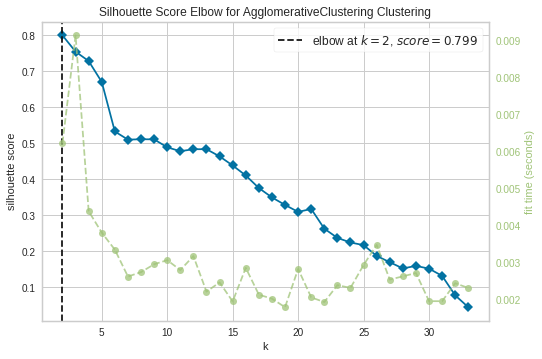

In [134]:
model1 = AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model1, k=(2,34), metric='silhouette')
visualizer.fit(X_olah)
visualizer.show()

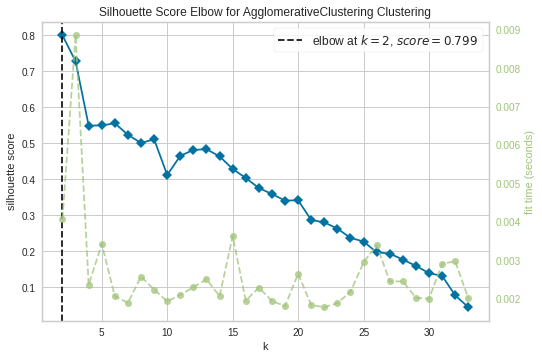

In [135]:
model2 = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model2, k=(2,34), metric='silhouette')
visualizer.fit(X_olah)
visualizer.show()

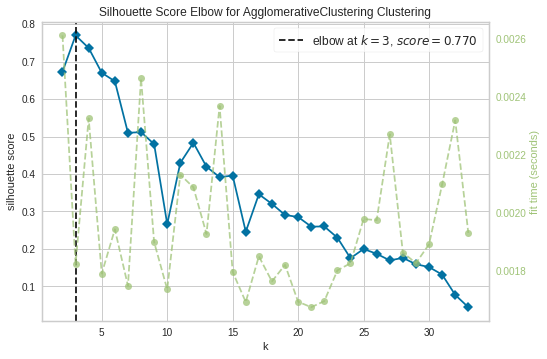

In [136]:
model3 = AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(model3, k=(2,34), metric='silhouette')
visualizer.fit(X_olah)
visualizer.show()

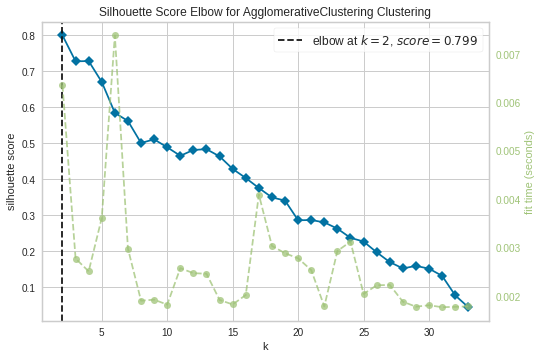

In [137]:
model4 = AgglomerativeClustering(linkage='complete')
visualizer = KElbowVisualizer(model4, k=(2,34), metric='silhouette')
visualizer.fit(X_olah)
visualizer.show()

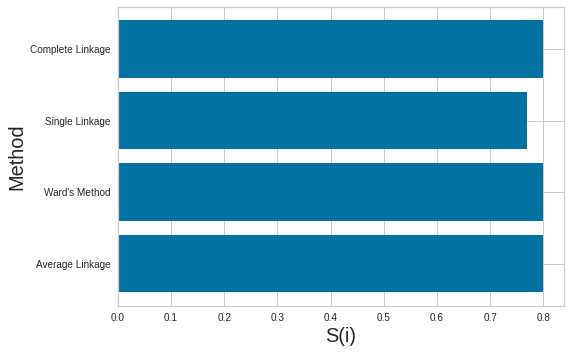

In [138]:

ac1 = AgglomerativeClustering(n_clusters = 2, linkage='average')
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='ward')
ac3 = AgglomerativeClustering(n_clusters = 3, linkage='single')
ac4 = AgglomerativeClustering(n_clusters = 2, linkage='complete')
sh1 = silhouette_score(X_olah, ac1.fit_predict(X_olah))
sh2 = silhouette_score(X_olah, ac2.fit_predict(X_olah))
sh3 = silhouette_score(X_olah, ac3.fit_predict(X_olah))
sh4 = silhouette_score(X_olah, ac4.fit_predict(X_olah))


k = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(sh1)
silhouette_scores.append(sh2)
silhouette_scores.append(sh3)
silhouette_scores.append(sh4)
  
# Plotting a bar graph to compare the results
plt.barh(k, silhouette_scores)
plt.ylabel('Method', fontsize = 20)
plt.xlabel('S(i)', fontsize = 20)
plt.show()

In [139]:
method = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
score_method = pd.DataFrame(method, columns=['Metode'])
score_method['silhouette_score'] = [sh1,sh2,sh3,sh4]

score_method = score_method.sort_values(by=['silhouette_score'], ascending=False)

score_method
score_method.to_excel (r'/content/drive/MyDrive/silhouette_score_statpro.xlsx', index = False, header=True)
score_method

,Metode,silhouette_score
0,Average Linkage,0.799350
1,Ward's Method,0.799350
3,Complete Linkage,0.799350
2,Single Linkage,0.769819


## Dendrogram

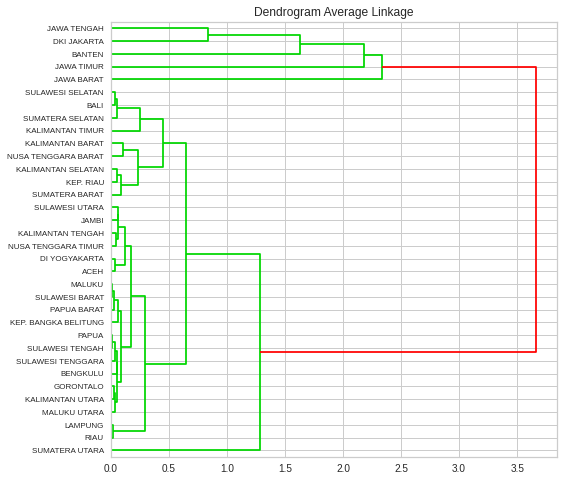

In [140]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram Average Linkage')
shc.set_link_color_palette(['#00d600'])
Dendrogram1 = shc.dendrogram((shc.linkage(X_olah, method ='average')), labels=label, orientation='right',above_threshold_color='#FF0000')

## Result

In [141]:
cluster = ac1.fit_predict(X_olah)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [142]:
X['cluster'] = cluster + 1
X.to_excel (r'/content/drive/MyDrive/klaster_statpro.xlsx', index = False, header=True)
X

,kode_prov,provinsi,X1,X2,cluster
0,11,Aceh,2781.50,47756,2
1,12,Sumatera Utara,8324.86,252098,2
2,13,Sumatera Barat,3445.08,101036,2
3,14,Riau,4646.79,20710,2
4,15,Jambi,1932.00,40393,2
5,16,Sumatera Selatan,5258.23,153784,2
6,17,Bengkulu,955.47,25690,2
7,18,Lampung,4686.09,18181,2
8,19,Kepulauan Bangka Belitung,1166.93,8377,2
9,21,Kepulauan Riau,3346.31,116252,2


In [143]:
klaster = X.groupby(["cluster"]).mean()

klaster.iloc[:,1:4].to_excel (r'/content/drive/MyDrive/interpretasi_statpro.xlsx', index = True, header=True)
round(klaster.iloc[:,1:4],2)

,X1,X2
cluster,,
1,35042.77,460942.00
2,2497.91,62950.45
